In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Perhitungan PSH menggunakan data hasil pengukuran

In [158]:
df = pd.read_excel("Data Praktikum Modul 7 Untuk Peserta.xlsx")

In [159]:
df.fillna('', inplace=True)
df.head()

,No,Menit ke,Hari,Jam(WIB),Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
0,1,5,"Selasa, 6 Maret 2018",10:00:00,0.57,19.1,791,0.52,18.9,10.887,9.828
1,2,10,,10:15:00,0.55,18.9,612,0.50,18.6,10.395,9.300
2,3,15,,10:20:00,0.57,19.2,783,0.52,19.0,10.944,9.880
3,4,20,,10:25:00,0.56,19.1,873,0.51,18.8,10.696,9.588
4,5,25,,10:30:00,0.56,18.9,871,0.50,18.7,10.584,9.350


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 102 non-null    int64  
 1   Menit ke           102 non-null    int64  
 2   Hari               102 non-null    object 
 3   Jam(WIB)           102 non-null    object 
 4   Arus (Ampere)      102 non-null    float64
 5   Voltase (Volt)     102 non-null    float64
 6   Intensitas (W/m2)  102 non-null    int64  
 7   Arus (Ampere).1    102 non-null    float64
 8   Voltase (Volt).1   102 non-null    float64
 9   Daya A             102 non-null    float64
 10  Daya B             102 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.9+ KB


In [167]:
df.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,53.529412,0.544314,18.487255,612.882353,0.526569,17.996078,10.133500,9.568304
std,29.588849,29.606230,0.063300,1.933123,336.561568,0.059395,2.091942,1.855226,1.754323
min,1.000000,5.000000,0.320000,7.100000,75.000000,0.310000,6.800000,3.456000,2.139000
25%,26.250000,30.000000,0.510000,18.300000,280.500000,0.500000,17.700000,9.150000,8.836500
50%,51.500000,55.000000,0.540000,18.900000,653.500000,0.520000,18.500000,10.327000,9.449000
75%,76.750000,80.000000,0.580000,19.300000,925.000000,0.570000,18.800000,11.237500,10.522250
max,102.000000,105.000000,0.710000,20.700000,1186.000000,0.670000,19.900000,14.342000,13.333000


In [161]:
Waktu = df["Menit ke"]
Intensitas = df["Intensitas (W/m2)"]

In [162]:
data_hari_1 = df[:21]
data_hari_1.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,55.000000,0.545714,18.728571,786.000000,0.491905,18.500000,10.226143,9.106333
std,6.204837,31.024184,0.015024,0.448490,227.674109,0.017210,0.403733,0.502538,0.498833
min,1.000000,5.000000,0.510000,17.300000,242.000000,0.450000,17.200000,8.823000,7.740000
25%,6.000000,30.000000,0.540000,18.800000,791.000000,0.490000,18.500000,10.152000,9.065000
50%,11.000000,55.000000,0.550000,18.900000,876.000000,0.490000,18.600000,10.395000,9.114000
75%,16.000000,80.000000,0.550000,18.900000,917.000000,0.500000,18.700000,10.395000,9.350000
max,21.000000,105.000000,0.570000,19.200000,954.000000,0.520000,19.000000,10.944000,9.880000


In [163]:
data_hari_2 = df[21:41]
data_hari_2.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,31.50000,52.500000,0.560500,16.995000,473.850000,0.491500,16.780000,9.803450,8.579500
std,5.91608,29.580399,0.114316,3.828766,365.683682,0.088691,4.363195,3.489602,3.059584
min,22.00000,5.000000,0.320000,7.100000,75.000000,0.310000,6.800000,3.456000,2.139000
25%,26.75000,28.750000,0.510000,16.650000,162.500000,0.457500,17.400000,8.415000,7.872750
50%,31.50000,52.500000,0.595000,19.100000,339.000000,0.520000,18.800000,11.328000,9.776000
75%,36.25000,76.250000,0.632500,19.300000,854.000000,0.550000,19.100000,12.191250,10.518750
max,41.00000,100.000000,0.710000,20.200000,1031.000000,0.630000,19.800000,14.342000,12.474000


In [164]:
data_hari_3 = df[41:61]
data_hari_3.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,51.50000,52.500000,0.527000,18.890000,743.700000,0.557000,18.370000,9.999500,10.274300
std,5.91608,29.580399,0.047914,1.036137,398.070755,0.052022,0.896837,1.448895,1.454656
min,42.00000,5.000000,0.470000,17.000000,166.000000,0.500000,16.700000,7.990000,8.350000
25%,46.75000,28.750000,0.480000,17.800000,226.250000,0.507500,17.400000,8.544000,8.792250
50%,51.50000,52.500000,0.525000,19.150000,964.000000,0.555000,18.550000,10.027000,10.295500
75%,56.25000,76.250000,0.550000,19.425000,1061.500000,0.585000,18.925000,10.683750,11.071500
max,61.00000,100.000000,0.650000,20.700000,1186.000000,0.670000,19.900000,13.455000,13.333000


In [165]:
data_hari_1 = df[61:81]
data_hari_1.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,71.50000,52.500000,0.546500,18.965000,568.90000,0.544500,17.845000,10.381000,9.728650
std,5.91608,29.580399,0.036168,0.499763,263.22132,0.031368,0.681697,0.952716,0.833502
min,62.00000,5.000000,0.500000,18.200000,272.00000,0.500000,16.300000,9.100000,8.150000
25%,66.75000,28.750000,0.510000,18.500000,364.50000,0.517500,17.525000,9.435000,9.112500
50%,71.50000,52.500000,0.545000,19.050000,478.00000,0.545000,17.900000,10.382500,9.878000
75%,76.25000,76.250000,0.580000,19.400000,744.00000,0.572500,18.500000,11.252000,10.355750
max,81.00000,100.000000,0.610000,19.600000,1060.00000,0.590000,18.700000,11.956000,11.033000


In [166]:
data_hari_1 = df[81:]
data_hari_1.describe()

,No,Menit ke,Arus (Ampere),Voltase (Volt),Intensitas (W/m2),Arus (Ampere).1,Voltase (Volt).1,Daya A,Daya B
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,92.000000,55.000000,0.541905,18.828571,489.476190,0.548571,18.438095,10.247095,10.146905
std,6.204837,31.024184,0.059968,0.828337,301.601329,0.047884,0.729710,1.578950,1.285535
min,82.000000,5.000000,0.470000,17.600000,168.000000,0.490000,17.200000,8.272000,8.428000
25%,87.000000,30.000000,0.500000,18.200000,258.000000,0.500000,17.900000,9.100000,8.950000
50%,92.000000,55.000000,0.520000,18.600000,321.000000,0.540000,18.300000,9.672000,9.882000
75%,97.000000,80.000000,0.590000,19.500000,766.000000,0.590000,19.100000,11.505000,11.269000
max,102.000000,105.000000,0.690000,20.700000,1024.000000,0.650000,19.700000,13.869000,12.805000


In [132]:
# Data Intensitas dan waktu pada Selasa, 6 Maret 2018
Data_Waktu_hari_1 = Waktu[:21]
Data_Intensitas_hari_1 = Intensitas[:21]

# Data Intensitas dan waktu pada Rabu, 7 Maret 2018
Data_Waktu_hari_2 = Waktu[21:41]
Data_Intensitas_hari_2 = Intensitas[21:41]

# Data Intensitas dan waktu pada Kamis, 8 Maret 2018
Data_Waktu_hari_3 = Waktu[41:61]
Data_Intensitas_hari_3 = Intensitas[41:61]

# Data Intensitas dan waktu pada Selasa, 13 Maret 2018
Data_Waktu_hari_4 = Waktu[61:81]
Data_Intensitas_hari_4 = Intensitas[61:81]

# Data Intensitas dan waktu pada Rabu, 14 Maret 2018 
Data_Waktu_hari_5 = Waktu[81:]
Data_Intensitas_hari_5 = Intensitas[81:]

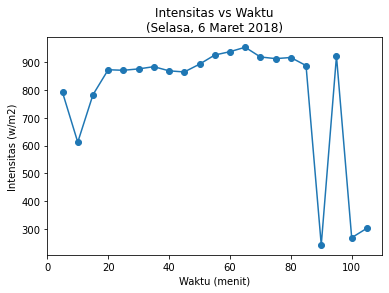

In [133]:
# Plot Intensitas vs Waktu pada Selasa, 6 Maret 2018

plt.plot(Data_Waktu_hari_1,Data_Intensitas_hari_1)
plt.scatter(Data_Waktu_hari_1,Data_Intensitas_hari_1)
plt.title("Intensitas vs Waktu\n(Selasa, 6 Maret 2018)")
plt.xlabel("Waktu (menit)")
plt.ylabel("Intensitas (w/m2)")
plt.show()

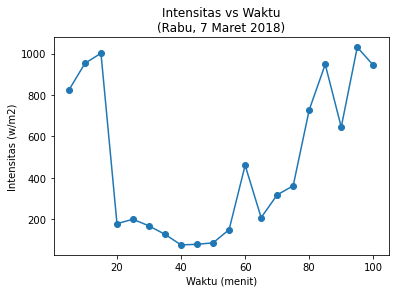

In [134]:
# Plot Intensitas vs Waktu pada Rabu, 7 Maret 2018

plt.plot(Data_Waktu_hari_2,Data_Intensitas_hari_2)
plt.scatter(Data_Waktu_hari_2,Data_Intensitas_hari_2)
plt.title("Intensitas vs Waktu\n(Rabu, 7 Maret 2018)")
plt.xlabel("Waktu (menit)")
plt.ylabel("Intensitas (w/m2)")
plt.show()

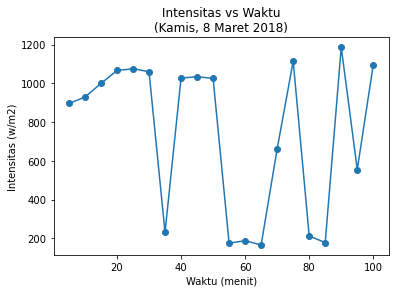

In [135]:
# Plot Intensitas vs Waktu pada Kamis, 8 Maret 2018

plt.plot(Data_Waktu_hari_3,Data_Intensitas_hari_3)
plt.scatter(Data_Waktu_hari_3,Data_Intensitas_hari_3)
plt.title("Intensitas vs Waktu\n(Kamis, 8 Maret 2018)")
plt.xlabel("Waktu (menit)")
plt.ylabel("Intensitas (w/m2)")
plt.show()

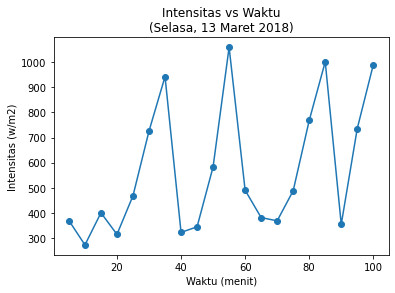

In [136]:
# Plot Intensitas vs Waktu pada Selasa, 13 Maret 2018

plt.plot(Data_Waktu_hari_4,Data_Intensitas_hari_4)
plt.scatter(Data_Waktu_hari_4,Data_Intensitas_hari_4)
plt.title("Intensitas vs Waktu\n(Selasa, 13 Maret 2018)")
plt.xlabel("Waktu (menit)")
plt.ylabel("Intensitas (w/m2)")
plt.show()

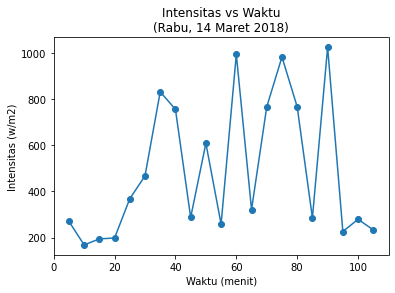

In [137]:
# Plot Intensitas vs Waktu pada Rabu, 14 Maret 2018

plt.plot(Data_Waktu_hari_5,Data_Intensitas_hari_5)
plt.scatter(Data_Waktu_hari_5,Data_Intensitas_hari_5)
plt.title("Intensitas vs Waktu\n(Rabu, 14 Maret 2018)")
plt.xlabel("Waktu (menit)")
plt.ylabel("Intensitas (w/m2)")
plt.show()

In [156]:
# Perhitungan PSH menggunakan algoritma scikit-learn
area_surface_under_curve_hari_1 = auc(Data_Waktu_hari_1,Data_Intensitas_hari_1)
PSH_hari_1 = area_surface_under_curve_hari_1 / (60 * 1000)

area_surface_under_curve_hari_2 = auc(Data_Waktu_hari_2,Data_Intensitas_hari_2)
PSH_hari_2 = area_surface_under_curve_hari_2 / (60 * 1000)

area_surface_under_curve_hari_3 = auc(Data_Waktu_hari_3,Data_Intensitas_hari_3)
PSH_hari_3 = area_surface_under_curve_hari_3 / (60 * 1000)

area_surface_under_curve_hari_4 = auc(Data_Waktu_hari_4,Data_Intensitas_hari_4)
PSH_hari_4 = area_surface_under_curve_hari_4 / (60 * 1000)

area_surface_under_curve_hari_5 = auc(Data_Waktu_hari_1,Data_Intensitas_hari_5)
PSH_hari_5 = area_surface_under_curve_hari_5 / (60 * 1000)

print(f"PSH hari 1 = {PSH_hari_1} jam")
print(f"PSH hari 2 = {PSH_hari_2} jam")
print(f"PSH hari 3 = {PSH_hari_3} jam")
print(f"PSH hari 4 = {PSH_hari_4} jam")
print(f"PSH hari 5 = {PSH_hari_5} jam")

PSH hari 1 = 1.3299583333333334 jam
PSH hari 2 = 0.7160833333333333 jam
PSH hari 3 = 1.1565 jam
PSH hari 4 = 0.8915416666666667 jam
PSH hari 5 = 0.835625 jam


# Perhitungan PSH menggunakan data solar Insulation dari NASA

In [151]:
df = pd.read_csv("Data_Solar_Insulation_NASA.csv")
df.head()

,Latitude,Longitude,Year,Month,Day,Solar Insulation
0,-7.76619,110.37321,2018,3,6,5.43
1,-7.76619,110.37321,2018,3,7,5.76
2,-7.76619,110.37321,2018,3,8,4.24
3,-7.76619,110.37321,2018,3,13,4.50
4,-7.76619,110.37321,2018,3,14,6.08


In [153]:
for i,j in enumerate(df["Solar Insulation"]):
    PSH = (j * (10**3)) / 1000
    print(f"Nilai PSH hari {i + 1} adalah {PSH} jam")

Nilai PSH hari 1 adalah 5.43 jam
Nilai PSH hari 2 adalah 5.76 jam
Nilai PSH hari 3 adalah 4.24 jam
Nilai PSH hari 4 adalah 4.5 jam
Nilai PSH hari 5 adalah 6.08 jam
